In [ ]:
!pip install rdkit


In [ ]:
# Importing Libraries
import pandas as pd
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/cleaned_data.tsv' , sep='\t')


In [ ]:
# Select the 'Molecule ChEMBL ID' and 'Smiles' columns from the original dataframe
selected_columns = df[['Molecule ChEMBL ID' , 'Smiles' , 'Label']]
selected_columns.to_csv('smiles_2d_descriptors.tsv', sep='\t', index=False)

print("Molecule ChEMBL ID  , Smiles and Label columns saved to smiles_2d_descriptors.tsv")

Molecule ChEMBL ID  , Smiles and Label columns saved to smiles_2d_descriptors.tsv


In [ ]:
df=pd.read_csv('/content/smiles_2d_descriptors.tsv', sep='\t')

In [ ]:
df.head()

,Molecule ChEMBL ID,Smiles,Label
0,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,1
1,CHEMBL595,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,1
2,CHEMBL59132,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC2SC(=O)NC2=O)cc1,1
3,CHEMBL4127972,O=C1NC(=O)C(Cc2ccc(OCCOC(c3ccccc3)c3ccccc3)cc2)S1,1
4,CHEMBL4293295,CCc1ccc([C@H](O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1,1


Create an object of the molecule descriptor class

In [ ]:
mol_list = []

for smile in df['Smiles']:
  mol = Chem.MolFromSmiles(smile)
  mol = Chem.AddHs(mol)
  mol_list.append(mol)

df = pd.concat([df, pd.DataFrame(mol_list, columns = (['mol']))], axis=1)

In [ ]:
df.head()

,Molecule ChEMBL ID,Smiles,Label,mol
0,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,1,<rdkit.Chem.rdchem.Mol object at 0x7cf50ea42d50>
1,CHEMBL595,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,1,<rdkit.Chem.rdchem.Mol object at 0x7cf50ea42dc0>
2,CHEMBL59132,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC2SC(=O)NC2=O)cc1,1,<rdkit.Chem.rdchem.Mol object at 0x7cf50ea42e30>
3,CHEMBL4127972,O=C1NC(=O)C(Cc2ccc(OCCOC(c3ccccc3)c3ccccc3)cc2)S1,1,<rdkit.Chem.rdchem.Mol object at 0x7cf50ea42f80>
4,CHEMBL4293295,CCc1ccc([C@H](O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1,1,<rdkit.Chem.rdchem.Mol object at 0x7cf50ea42c70>


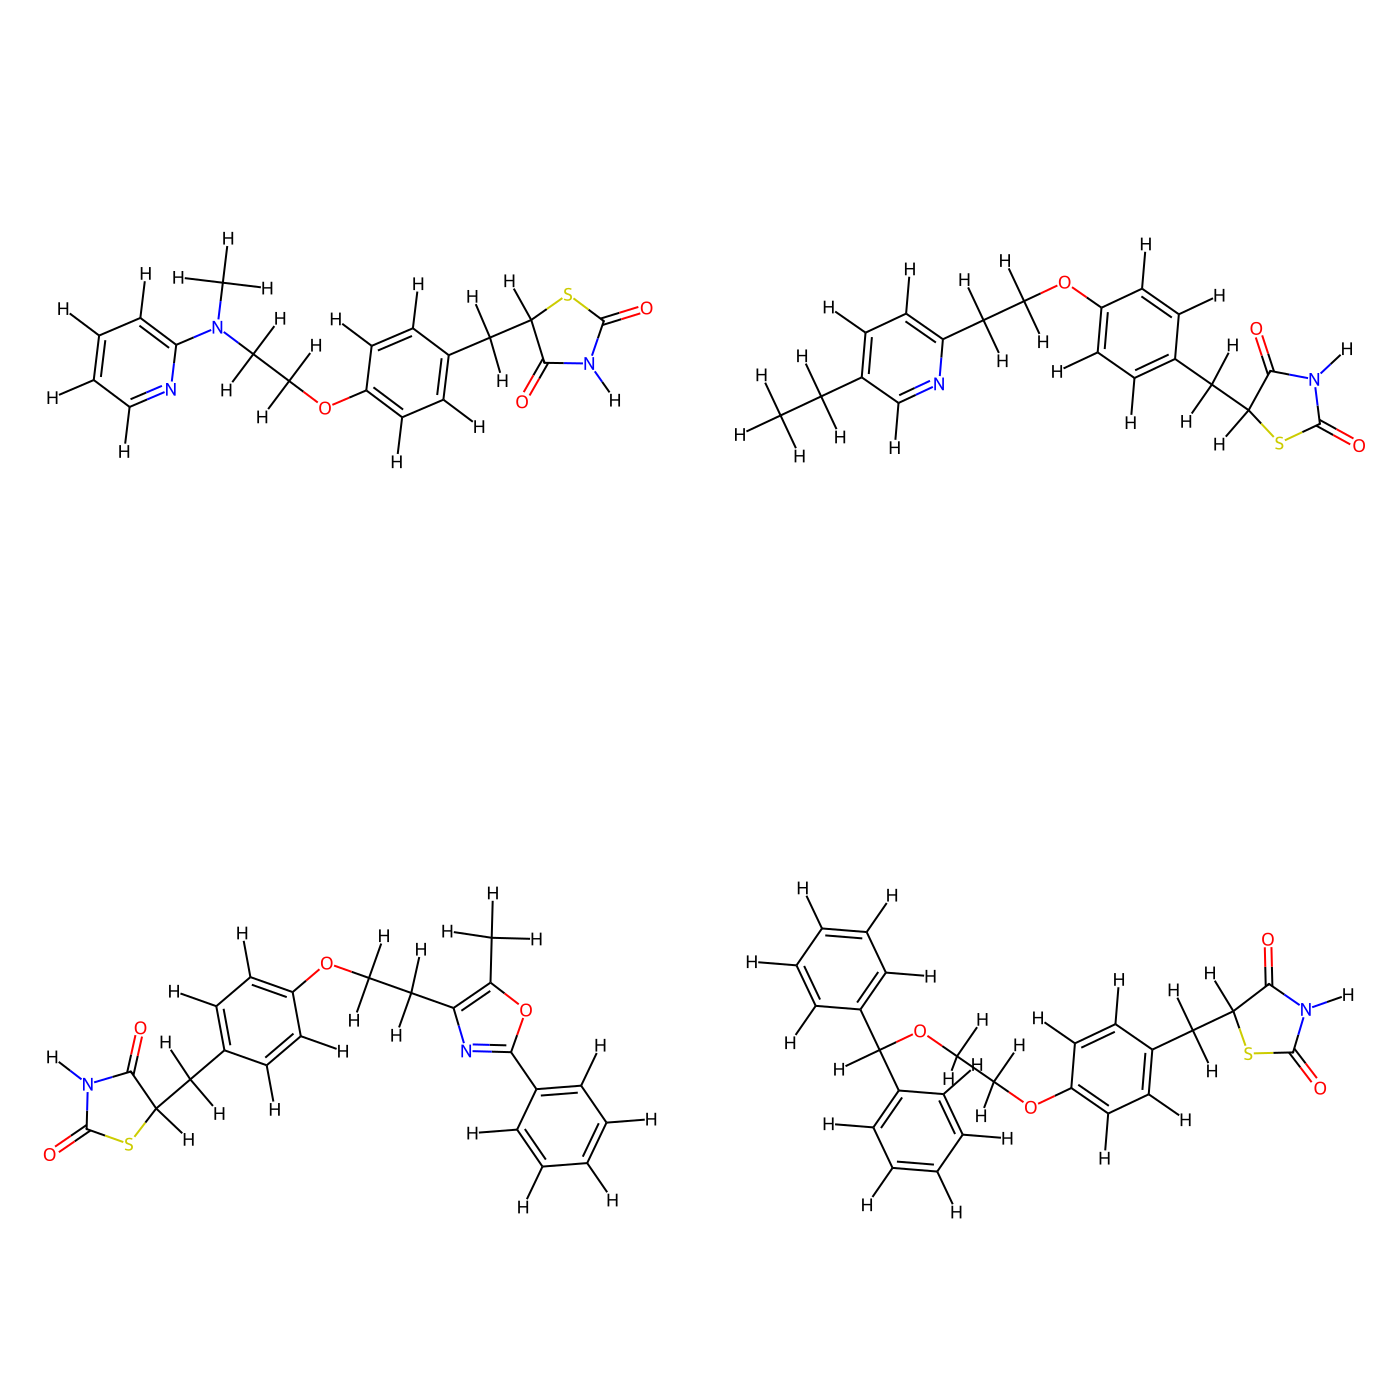

In [ ]:
Draw.MolsToGridImage(df['mol'][:4],molsPerRow=2,subImgSize=(700,700))


Generating Molecular Descriptors Using RDKit


Create an instance of the class to print names and number of descriptors

In [ ]:
Desc_list_func = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList)


In [ ]:
Desc_list_func


Call the instance to get names

In [ ]:
names = Desc_list_func.GetDescriptorNames()

Print the names of descriptors

In [ ]:
names

('MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'SPS',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',


Print the number of descriptors

In [ ]:
len(names)

217

Calculate all the descriptor for the whole dataset

In [ ]:
# create another instance for calculating molecular descriptors

Des_func = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList)

In [ ]:
des = []

for mol in df['mol']:
  des.append(Des_func.CalcDescriptors(mol))

In [ ]:
Final_df = pd.concat([df, pd.DataFrame(des, columns=(x[0] for x in Descriptors._descList))], axis=1)


In [ ]:
Final_df.head()

,Molecule ChEMBL ID,Smiles,Label,mol,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,1,<rdkit.Chem.rdchem.Mol object at 0x7cf50ea42d50>,12.395462,12.395462,0.266925,-3.989477,0.820855,33.120000,...,1,0,0,0,0,0,0,0,0,0
1,CHEMBL595,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,1,<rdkit.Chem.rdchem.Mol object at 0x7cf50ea42dc0>,12.390339,12.390339,0.260928,-3.836992,0.825254,34.480000,...,1,0,0,0,0,0,0,0,0,0
2,CHEMBL59132,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC2SC(=O)NC2=O)cc1,1,<rdkit.Chem.rdchem.Mol object at 0x7cf50ea42e30>,12.461054,12.461054,0.266071,-3.890868,0.632040,30.827586,...,1,0,0,0,0,0,0,0,0,0
3,CHEMBL4127972,O=C1NC(=O)C(Cc2ccc(OCCOC(c3ccccc3)c3ccccc3)cc2)S1,1,<rdkit.Chem.rdchem.Mol object at 0x7cf50ea42f80>,12.526541,12.526541,0.300905,-4.242887,0.492837,30.838710,...,1,0,0,0,0,0,0,0,0,0
4,CHEMBL4293295,CCc1ccc([C@H](O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1,1,<rdkit.Chem.rdchem.Mol object at 0x7cf50ea42c70>,12.412590,12.412590,0.270522,-3.904701,0.776778,35.461538,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Drop the 'mol' column
Final_df = Final_df.drop('mol', axis=1)

# Save the updated DataFrame to the same TSV file
Final_df.to_csv('/content/smiles_2d_descriptors.tsv', sep='\t', index=False)

print("Dropped 'mol' column and saved to /content/smiles_2d_descriptors.tsv")

Dropped 'mol' column and saved to /content/smiles_2d_descriptors.tsv


In [ ]:
df=pd.read_csv('/content/smiles_2d_descriptors.tsv', sep='\t')
df

,Molecule ChEMBL ID,Smiles,Label,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,1,12.395462,12.395462,0.266925,-3.989477,0.820855,33.120000,357.435,...,1,0,0,0,0,0,0,0,0,0
1,CHEMBL595,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,1,12.390339,12.390339,0.260928,-3.836992,0.825254,34.480000,356.447,...,1,0,0,0,0,0,0,0,0,0
2,CHEMBL59132,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC2SC(=O)NC2=O)cc1,1,12.461054,12.461054,0.266071,-3.890868,0.632040,30.827586,408.479,...,1,0,0,0,0,0,0,0,0,0
3,CHEMBL4127972,O=C1NC(=O)C(Cc2ccc(OCCOC(c3ccccc3)c3ccccc3)cc2)S1,1,12.526541,12.526541,0.300905,-4.242887,0.492837,30.838710,433.529,...,1,0,0,0,0,0,0,0,0,0
4,CHEMBL4293295,CCc1ccc([C@H](O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1,1,12.412590,12.412590,0.270522,-3.904701,0.776778,35.461538,372.446,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4332,CHEMBL200811,CCC(C(=O)O)C1CCc2cc(OCCn3nc(-c4ccccc4)c4ccccc4...,0,14.083844,14.083844,0.459638,-4.588864,0.380350,34.514286,468.553,...,0,0,0,0,0,0,0,0,0,0
4333,CHEMBL5182467,CCCCCCCCCCCCCCCc1cccc(OCC(=O)OCC)c1,0,12.507793,12.507793,1.630875,-5.328867,0.195318,42.000000,390.608,...,0,0,0,0,0,0,0,0,0,0
4334,CHEMBL30915,CCCCCCCCCCCCCCCc1cccc(OC)c1C(=O)O,0,12.768403,12.768403,1.523451,-5.297239,0.321118,40.923077,362.554,...,0,0,0,0,0,0,0,0,0,0
4335,CHEMBL4790305,CCCc1nc2cccc(C(=O)OC)c2n1Cc1ccc(-c2ccccc2C(=O)...,0,13.380650,13.380650,0.226940,-4.101424,0.364428,24.727273,442.515,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Columns: 220 entries, Molecule ChEMBL ID to fr_urea
dtypes: float64(107), int64(111), object(2)
memory usage: 7.3+ MB


In [ ]:
print(df.dtypes)

Molecule ChEMBL ID     object
Smiles                 object
Label                   int64
MaxAbsEStateIndex     float64
MaxEStateIndex        float64
                       ...   
fr_thiazole             int64
fr_thiocyan             int64
fr_thiophene            int64
fr_unbrch_alkane        int64
fr_urea                 int64
Length: 220, dtype: object


In [ ]:
import pandas as pd

# Load your file normally (no conversion yet)
df = pd.read_csv("/content/smiles_2d_descriptors.tsv", sep='\t')

# Symbols that might represent fake missing values
fake_missing = ['?', ' ', '', 'NA', 'N/A']

# Dictionary to store columns containing fake missing entries
fake_missing_cols = {}

# Loop through all columns (excluding the ID & SMILES)
id_cols = ['Molecule ChEMBL ID', 'Smiles']
for col in df.columns:
    if col not in id_cols:
        mask = df[col].isin(fake_missing)
        count = mask.sum()
        if count > 0:
            fake_missing_cols[col] = count

# Display result
if len(fake_missing_cols) == 0:
    print("✅ No fake missing values ('?', ' ', '', 'NA', 'N/A') found in any descriptor column.")
else:
    print(f"⚠️ Found {len(fake_missing_cols)} columns containing fake missing values:\n")
    for k, v in fake_missing_cols.items():
        print(f"{k}: {v} entries")


✅ No fake missing values ('?', ' ', '', 'NA', 'N/A') found in any descriptor column.


Descriptors Cleaning

Missing values - NaN

In [ ]:
#Checking missing values

import pandas as pd

# Load the file
df = pd.read_csv('/content/smiles_2d_descriptors.tsv', sep='\t')

# Check for missing values
missing_values = df.isnull().sum()

# Display only columns that have missing values
missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("No missing values found in the dataset!")
else:
    print("Columns with missing values:")
    print(missing_columns)



Columns with missing values:
MaxPartialCharge        9
MinPartialCharge        9
MaxAbsPartialCharge     9
MinAbsPartialCharge     9
BCUT2D_MWHI            52
BCUT2D_MWLOW           52
BCUT2D_CHGHI           52
BCUT2D_CHGLO           52
BCUT2D_LOGPHI          52
BCUT2D_LOGPLOW         52
BCUT2D_MRHI            52
BCUT2D_MRLOW           52
dtype: int64


In [ ]:
# to know the missing value percentage

import pandas as pd

# Load your 2D descriptor file
df = pd.read_csv('/content/smiles_2d_descriptors.tsv', sep='\t')

# Calculate percentage of missing values for each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Display columns with missing values and their percentages
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

if missing_percent.empty:
    print("No missing values found!")
else:
    print("Missing value percentage by column:\n")
    print(missing_percent)


Missing value percentage by column:

BCUT2D_CHGLO           1.198985
BCUT2D_CHGHI           1.198985
BCUT2D_MWLOW           1.198985
BCUT2D_MWHI            1.198985
BCUT2D_LOGPHI          1.198985
BCUT2D_LOGPLOW         1.198985
BCUT2D_MRHI            1.198985
BCUT2D_MRLOW           1.198985
MinAbsPartialCharge    0.207517
MaxAbsPartialCharge    0.207517
MinPartialCharge       0.207517
MaxPartialCharge       0.207517
dtype: float64


In [ ]:
import pandas as pd

# Load your data
df = pd.read_csv("/content/smiles_2d_descriptors.tsv", sep="\t")

# Columns that had missing values
cols_with_missing = [
    "BCUT2D_CHGLO", "BCUT2D_CHGHI", "BCUT2D_MWLOW", "BCUT2D_MWHI",
    "BCUT2D_LOGPHI", "BCUT2D_LOGPLOW", "BCUT2D_MRHI", "BCUT2D_MRLOW",
    "MinAbsPartialCharge", "MaxAbsPartialCharge",
    "MinPartialCharge", "MaxPartialCharge"
]

# Filter rows having NaN in any of these columns
rows_with_missing = df[df[cols_with_missing].isnull().any(axis=1)]

# Print total number of rows and show them
print(f"Total rows with missing values in these columns: {len(rows_with_missing)}")
display(rows_with_missing)


Total rows with missing values in these columns: 52


,Molecule ChEMBL ID,Smiles,Label,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
61,CHEMBL119278,O=C(Nc1ccc(OCCc2cccs2)cc1C(=O)[O-])c1ccc(Cl)cc...,0,13.132648,13.132648,0.000000,-3.613324,0.560058,18.000000,442.249,...,0,0,0,0,0,0,0,1,0,0
115,CHEMBL2113107,CCCCCOc1cc2ccccc2cc1C(O)C/C=C\CCCC(=O)[O-].[Na+],0,11.353579,11.353579,0.000000,-4.560761,0.335993,33.500000,392.471,...,0,0,0,0,0,0,0,0,0,0
118,CHEMBL196261,CCCCCOc1ccccc1C(O)CCCCCCC(=O)[O-].[Na+],0,11.322284,11.322284,0.000000,-4.934255,0.414976,37.083333,344.427,...,0,0,0,0,0,0,0,0,0,0
265,CHEMBL2024608,CCCCCS(=O)(=O)[N-]C(=O)C(C)(C)Cc1ccc(OCCOC)cc1...,0,14.264359,14.264359,0.000000,-7.207959,0.240440,27.538462,603.035,...,0,1,0,0,0,0,0,0,0,0
381,CHEMBL2024613,CCCCCS(=O)(=O)[N-]C(=O)/C=C/c1ccc(OCCOC)cc1Oc1...,0,13.522415,13.522415,0.000000,-6.600699,0.212654,25.861111,554.628,...,0,1,0,0,0,0,0,0,0,0
388,CHEMBL325172,O=C(O)c1cccc(-c2ccc(NC(=O)c3ccc(Cl)cc3Cl)c(C(=...,0,13.180462,13.180462,0.000000,-2.284702,0.580537,15.533333,436.176,...,0,0,0,0,0,0,0,0,0,0
396,CHEMBL1630384,Cc1cc([Se]Cc2sc(-c3ccc(C(F)(F)F)c(F)c3)nc2C)cc...,0,14.809666,14.809666,0.028409,-5.539737,0.320588,23.212121,546.444,...,0,0,0,0,0,1,0,0,0,0
397,CHEMBL1630383,Cc1cc([Se]Cc2sc(-c3ccc(C(F)(F)F)c(F)c3)nc2C)cc...,0,14.718086,14.718086,0.041552,-5.496244,0.367802,21.096774,518.390,...,0,0,0,0,0,1,0,0,0,0
698,CHEMBL198034,CCCCCOc1ncccc1C(O)CCCCCCC(=O)[O-].[Na+],0,11.301190,11.301190,0.000000,-4.894761,0.394734,36.500000,345.415,...,0,0,0,0,0,0,0,0,0,0
877,CHEMBL198163,CCCCCOc1cc2ccccc2cc1C(O)CC#CCCCC(=O)[O-].[Na+],0,11.241358,11.241358,0.000000,-4.500273,0.369498,30.928571,390.455,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd

# Load your data
df = pd.read_csv("/content/smiles_2d_descriptors.tsv", sep="\t")

# Columns that had missing values
cols_with_missing = [
    "BCUT2D_CHGLO", "BCUT2D_CHGHI", "BCUT2D_MWLOW", "BCUT2D_MWHI",
    "BCUT2D_LOGPHI", "BCUT2D_LOGPLOW", "BCUT2D_MRHI", "BCUT2D_MRLOW",
    "MinAbsPartialCharge", "MaxAbsPartialCharge",
    "MinPartialCharge", "MaxPartialCharge"
]

# Drop rows with missing values in those columns
df_cleaned = df.dropna(subset=cols_with_missing)

# Show how many rows were dropped
print(f"Original rows: {len(df)}")
print(f"Remaining rows after dropping: {len(df_cleaned)}")
print(f"Rows dropped: {len(df) - len(df_cleaned)}")

# Display the remaining rows
display(df_cleaned)

# (Optional) Save the cleaned file
df_cleaned.to_csv("/content/smiles_2d_descriptors.tsv", sep="\t", index=False)


Original rows: 4337
Remaining rows after dropping: 4285
Rows dropped: 52


,Molecule ChEMBL ID,Smiles,Label,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,1,12.395462,12.395462,0.266925,-3.989477,0.820855,33.120000,357.435,...,1,0,0,0,0,0,0,0,0,0
1,CHEMBL595,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,1,12.390339,12.390339,0.260928,-3.836992,0.825254,34.480000,356.447,...,1,0,0,0,0,0,0,0,0,0
2,CHEMBL59132,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC2SC(=O)NC2=O)cc1,1,12.461054,12.461054,0.266071,-3.890868,0.632040,30.827586,408.479,...,1,0,0,0,0,0,0,0,0,0
3,CHEMBL4127972,O=C1NC(=O)C(Cc2ccc(OCCOC(c3ccccc3)c3ccccc3)cc2)S1,1,12.526541,12.526541,0.300905,-4.242887,0.492837,30.838710,433.529,...,1,0,0,0,0,0,0,0,0,0
4,CHEMBL4293295,CCc1ccc([C@H](O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1,1,12.412590,12.412590,0.270522,-3.904701,0.776778,35.461538,372.446,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4332,CHEMBL200811,CCC(C(=O)O)C1CCc2cc(OCCn3nc(-c4ccccc4)c4ccccc4...,0,14.083844,14.083844,0.459638,-4.588864,0.380350,34.514286,468.553,...,0,0,0,0,0,0,0,0,0,0
4333,CHEMBL5182467,CCCCCCCCCCCCCCCc1cccc(OCC(=O)OCC)c1,0,12.507793,12.507793,1.630875,-5.328867,0.195318,42.000000,390.608,...,0,0,0,0,0,0,0,0,0,0
4334,CHEMBL30915,CCCCCCCCCCCCCCCc1cccc(OC)c1C(=O)O,0,12.768403,12.768403,1.523451,-5.297239,0.321118,40.923077,362.554,...,0,0,0,0,0,0,0,0,0,0
4335,CHEMBL4790305,CCCc1nc2cccc(C(=O)OC)c2n1Cc1ccc(-c2ccccc2C(=O)...,0,13.380650,13.380650,0.226940,-4.101424,0.364428,24.727273,442.515,...,0,0,0,0,0,0,0,0,0,0


Zero's - >90%

In [ ]:
import pandas as pd

# Load your cleaned data
file_path = "/content/smiles_2d_descriptors.tsv"
df = pd.read_csv(file_path, sep="\t")

# ---------------- 1️⃣ Check high-zero columns ----------------
descriptor_cols = [col for col in df.columns if col != "Label"]
df_features = df[descriptor_cols]

zero_percent = (df_features == 0).sum() / len(df_features) * 100
high_zero_cols = zero_percent[zero_percent > 90]

print(f"Number of columns with >90% zeros: {len(high_zero_cols)}")
print("Columns with >90% zeros:\n", high_zero_cols)




Number of columns with >90% zeros: 76
Columns with >90% zeros:
 NumRadicalElectrons    100.000000
SMR_VSA8               100.000000
SlogP_VSA9             100.000000
EState_VSA11            93.698950
EState_VSA3             97.269545
                          ...    
fr_thiazole             90.618436
fr_thiocyan            100.000000
fr_thiophene            98.156359
fr_unbrch_alkane       100.000000
fr_urea                 97.876313
Length: 76, dtype: float64


In [ ]:
# ---------------- 2️⃣ Drop high-zero columns ----------------
# Drop high-zero columns (convert Series index to list)
cols_before = df.shape[1]
df.drop(columns=high_zero_cols.index.tolist(), inplace=True, errors='ignore')
cols_after = df.shape[1]


# Save the cleaned dataframe
df.to_csv(file_path, sep="\t", index=False)

print(f"\n✅ Dropped {cols_before - cols_after} high-zero columns")
print(f"Remaining columns: {cols_after}")


✅ Dropped 76 high-zero columns
Remaining columns: 144


Low Variance Threshold - 0.01

In [ ]:
import pandas as pd
import numpy as np

# Load your cleaned data
file_path = "/content/smiles_2d_descriptors.tsv"
df = pd.read_csv(file_path, sep="\t")

ignore_cols = ['Label', 'Molecule_ChEMBL_ID', 'SMILES']
descriptor_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in ignore_cols]
numeric_df = df[descriptor_cols]

threshold = 0.01
variances = numeric_df.var()
low_variance_cols = variances[variances < threshold]

print(f"Number of columns with variance < {threshold}: {len(low_variance_cols)}")
print("Columns with low variance:\n", low_variance_cols)



Number of columns with variance < 0.01: 6
Columns with low variance:
 MaxPartialCharge       0.004383
MinPartialCharge       0.001458
MaxAbsPartialCharge    0.001432
MinAbsPartialCharge    0.003135
BCUT2D_CHGLO           0.008098
BCUT2D_LOGPHI          0.006621
dtype: float64


In [ ]:
# ---------------- 2️⃣ Drop low-variance columns ----------------
cols_before = df.shape[1]
df.drop(columns=low_variance_cols.index, inplace=True, errors='ignore')
cols_after = df.shape[1]

# Save the cleaned dataframe
df.to_csv(file_path, sep="\t", index=False)

print(f"\n✅ Dropped {cols_before - cols_after} low-variance columns")
print(f"Remaining columns: {cols_after}")



✅ Dropped 6 low-variance columns
Remaining columns: 138


pearson coefficient correlation

Reduntant pairs

In [ ]:
import pandas as pd
import numpy as np

# Load your cleaned data
file_path = "/content/smiles_2d_descriptors.tsv"
df = pd.read_csv(file_path, sep="\t")

# Columns to ignore
ignore_cols = ['Molecule_ChEMBL_ID', 'SMILES', 'Label']

# Select only numeric descriptor columns (exclude ignore_cols)
descriptor_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in ignore_cols]
df_features = df[descriptor_cols]

# Correlation matrix
corr_matrix = df_features.corr().abs()

# Upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find highly correlated pairs (correlation > 0.9)
redundant_pairs = []
for col in upper.columns:
    for row in upper.index:
        if not pd.isnull(upper.loc[row, col]) and upper.loc[row, col] > 0.9:
            redundant_pairs.append((row, col, round(upper.loc[row, col], 3)))

# Convert to dataframe
redundant_pairs_df = pd.DataFrame(redundant_pairs, columns=["Descriptor_1", "Descriptor_2", "Correlation"])
redundant_pairs_df = redundant_pairs_df.sort_values(by="Correlation", ascending=False)

print(f"Total highly correlated pairs (corr>0.9): {len(redundant_pairs_df)}")
redundant_pairs_df.head(20)


Total highly correlated pairs (corr>0.9): 83


,Descriptor_1,Descriptor_2,Correlation
0,MaxAbsEStateIndex,MaxEStateIndex,1.000
2,MolWt,ExactMolWt,1.000
82,NumAromaticCarbocycles,fr_benzene,1.000
81,NumAmideBonds,fr_amide,1.000
80,fr_COO,fr_COO2,0.999
20,Chi0n,Chi1n,0.998
1,MolWt,HeavyAtomMolWt,0.997
3,HeavyAtomMolWt,ExactMolWt,0.997
10,Chi0,Chi0n,0.990
19,Chi0,Chi1n,0.990


Reduntant descriptors

In [ ]:
import pandas as pd
import numpy as np

# Load your descriptor file
df = pd.read_csv("/content/smiles_2d_descriptors.tsv", sep="\t")

# Select only numeric descriptor columns, excluding Label
descriptor_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col != "Label"]
numeric_df = df[descriptor_cols]

# Now numeric_df contains only descriptor columns, Label is excluded
print("Shape of numeric descriptors:", numeric_df.shape)


Shape of numeric descriptors: (4285, 135)


In [ ]:
corr_matrix = numeric_df.corr(method='pearson')


In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


In [ ]:
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.9)]

print(f"Total redundant descriptors: {len(to_drop)}")
print("List of redundant descriptors:")
print(to_drop)


Total redundant descriptors: 32
List of redundant descriptors:
['MaxEStateIndex', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BertzCT', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'LabuteASA', 'SlogP_VSA6', 'EState_VSA1', 'VSA_EState1', 'VSA_EState10', 'HeavyAtomCount', 'NOCount', 'NumHDonors', 'RingCount', 'MolMR', 'fr_Ar_N', 'fr_COO2', 'fr_amide', 'fr_benzene']


In [ ]:
cleaned_df = df.drop(columns=to_drop)


In [ ]:
cleaned_df.to_csv("/content/smiles_2d_descriptors.tsv", sep="\t", index=False)
print("✅ Cleaned file saved at: /content/smiles_2d_descriptors.tsv")


✅ Cleaned file saved at: /content/smiles_2d_descriptors.tsv


In [ ]:
df = pd.read_csv("/content/smiles_2d_descriptors.tsv", sep="\t")
df

,Molecule ChEMBL ID,Smiles,Label,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,FpDensityMorgan1,...,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ether,fr_halogen,fr_methoxy,fr_oxazole,fr_para_hydroxylation,fr_pyridine,fr_sulfide
0,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,1,12.395462,0.266925,-3.989477,0.820855,33.120000,357.435,1.440000,...,1,0,0,1,0,0,0,0,1,1
1,CHEMBL595,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,1,12.390339,0.260928,-3.836992,0.825254,34.480000,356.447,1.360000,...,0,1,0,1,0,0,0,0,1,1
2,CHEMBL59132,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC2SC(=O)NC2=O)cc1,1,12.461054,0.266071,-3.890868,0.632040,30.827586,408.479,1.310345,...,0,2,0,1,0,0,1,0,0,1
3,CHEMBL4127972,O=C1NC(=O)C(Cc2ccc(OCCOC(c3ccccc3)c3ccccc3)cc2)S1,1,12.526541,0.300905,-4.242887,0.492837,30.838710,433.529,1.000000,...,0,0,0,2,0,0,0,0,0,1
4,CHEMBL4293295,CCc1ccc([C@H](O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1,1,12.412590,0.270522,-3.904701,0.776778,35.461538,372.446,1.500000,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,CHEMBL200811,CCC(C(=O)O)C1CCc2cc(OCCn3nc(-c4ccccc4)c4ccccc4...,0,14.083844,0.459638,-4.588864,0.380350,34.514286,468.553,1.314286,...,0,1,2,1,0,0,0,0,0,0
4281,CHEMBL5182467,CCCCCCCCCCCCCCCc1cccc(OCC(=O)OCC)c1,0,12.507793,1.630875,-5.328867,0.195318,42.000000,390.608,0.928571,...,0,0,0,2,0,0,0,0,0,0
4282,CHEMBL30915,CCCCCCCCCCCCCCCc1cccc(OC)c1C(=O)O,0,12.768403,1.523451,-5.297239,0.321118,40.923077,362.554,1.038462,...,0,0,0,1,0,1,0,0,0,0
4283,CHEMBL4790305,CCCc1nc2cccc(C(=O)OC)c2n1Cc1ccc(-c2ccccc2C(=O)...,0,13.380650,0.226940,-4.101424,0.364428,24.727273,442.515,0.969697,...,0,1,1,2,0,2,0,1,0,0


Changing the Label column to last column

In [ ]:
import pandas as pd

# Load the dataframe
df = pd.read_csv("/content/smiles_2d_descriptors.tsv", sep="\t")

# Extract the 'Label' column
label_column = df['Label']

# Drop the 'Label' column from its current position
df = df.drop(columns=['Label'])

# Add the 'Label' column back as the last column
df['Label'] = label_column

# Save the modified DataFrame back to the same TSV file
df.to_csv("/content/smiles_2d_descriptors.tsv", sep="\t", index=False)

print("✅ 'Label' column moved to the last position and saved to /content/smiles_2d_descriptors.tsv")

# Display the head of the updated DataFrame
df.head()

✅ 'Label' column moved to the last position and saved to /content/smiles_2d_descriptors.tsv


,Molecule ChEMBL ID,Smiles,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,FpDensityMorgan1,BCUT2D_MWHI,...,fr_aryl_methyl,fr_bicyclic,fr_ether,fr_halogen,fr_methoxy,fr_oxazole,fr_para_hydroxylation,fr_pyridine,fr_sulfide,Label
0,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,12.395462,0.266925,-3.989477,0.820855,33.120000,357.435,1.440000,32.166729,...,0,0,1,0,0,0,0,1,1,1
1,CHEMBL595,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,12.390339,0.260928,-3.836992,0.825254,34.480000,356.447,1.360000,32.166729,...,1,0,1,0,0,0,0,1,1,1
2,CHEMBL59132,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC2SC(=O)NC2=O)cc1,12.461054,0.266071,-3.890868,0.632040,30.827586,408.479,1.310345,32.166729,...,2,0,1,0,0,1,0,0,1,1
3,CHEMBL4127972,O=C1NC(=O)C(Cc2ccc(OCCOC(c3ccccc3)c3ccccc3)cc2)S1,12.526541,0.300905,-4.242887,0.492837,30.838710,433.529,1.000000,32.166729,...,0,0,2,0,0,0,0,0,1,1
4,CHEMBL4293295,CCc1ccc([C@H](O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1,12.412590,0.270522,-3.904701,0.776778,35.461538,372.446,1.500000,32.166729,...,0,0,1,0,0,0,0,1,1,1
